# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
base = pd.read_csv('base_slearn.csv')

In [12]:
base.mau = base.mau.astype(int)
x_test = base.sample(frac =.3)
y_test = x_test['mau']
x_test = x_test.drop('mau', axis = 1)
x_train = base.drop(x_test.index)
y_train = x_train['mau']
x_train = x_train.drop('mau', axis = 1)
y_test.value_counts()

0    4876
1     119
Name: mau, dtype: int64

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [4]:
clf = DecisionTreeClassifier(random_state=100)
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=100)

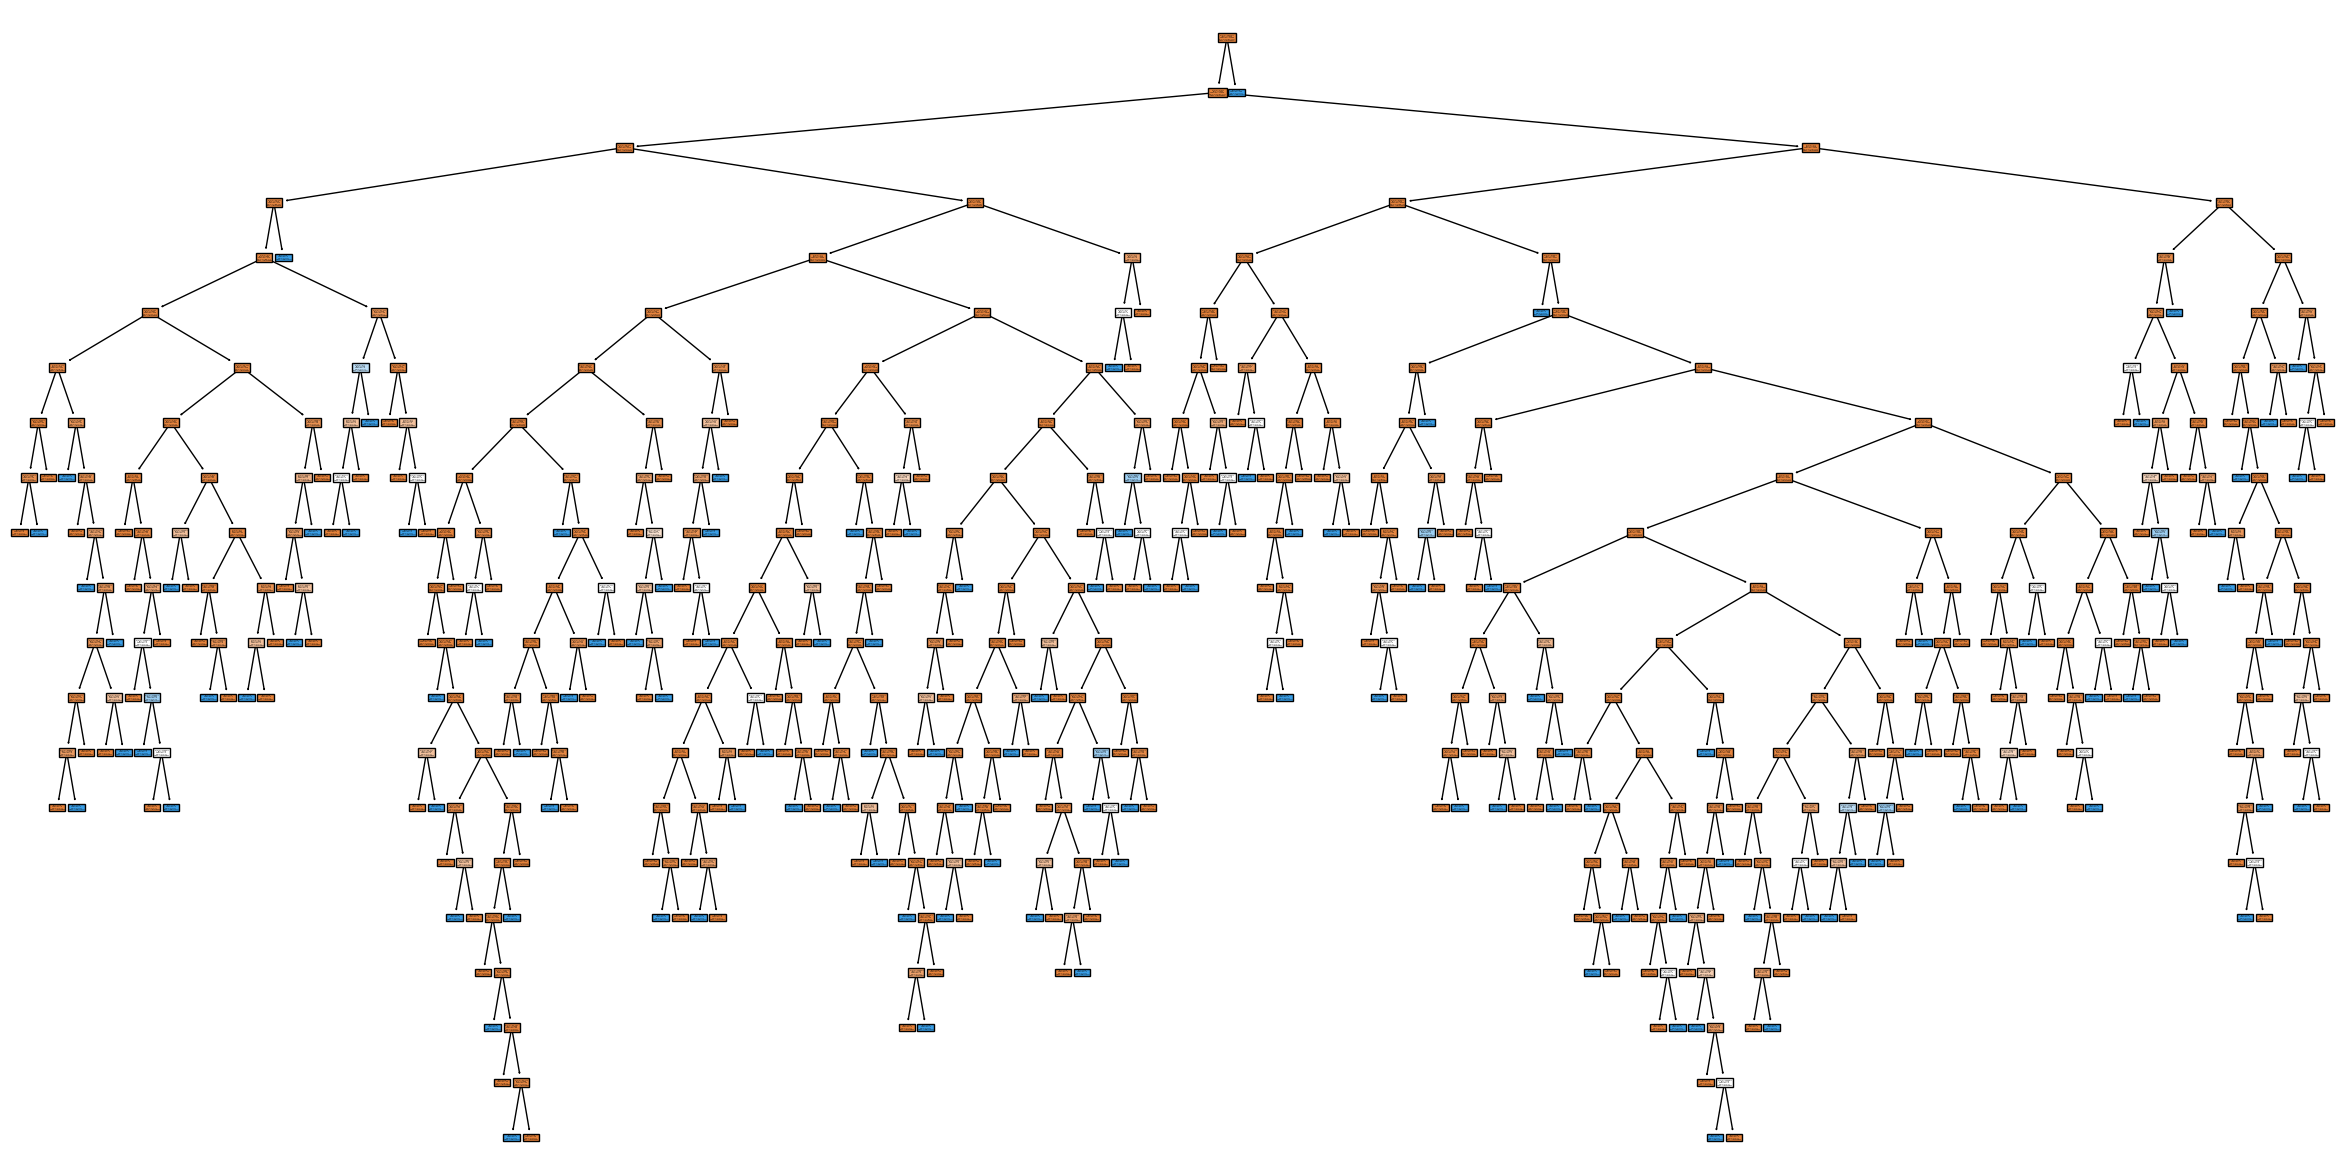

In [7]:
plt.figure(figsize=(30,15))
plot_tree(clf,
         filled=True,
         class_names=['aprovados','reprovados'],
         feature_names=x_train.columns);

C:\Users\dedaz\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


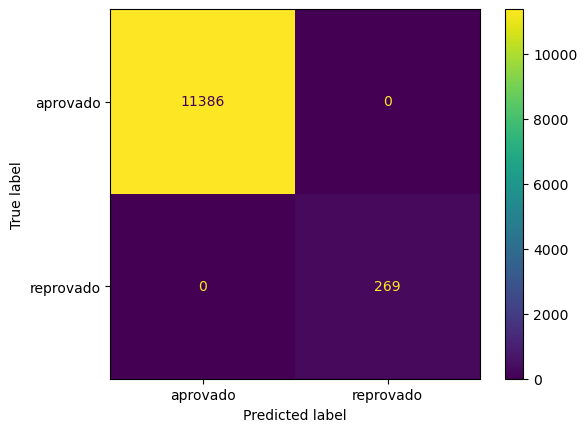

In [10]:
plot_confusion_matrix(clf, x_train, y_train, display_labels=['aprovado','reprovado'])

In [13]:
predict = clf.predict(x_train)

In [14]:
accuracy_score(y_train, predict)

0.9954525954525955

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

C:\Users\dedaz\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


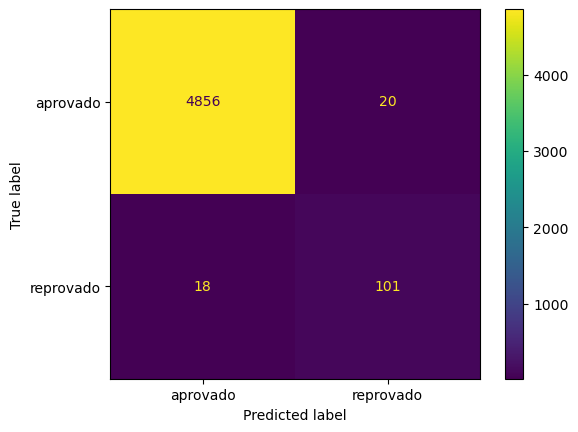

In [16]:
predict = clf.predict(x_test)
plot_confusion_matrix(clf, x_test, y_test, display_labels=['aprovado','reprovado'])

In [17]:
accuracy_score(y_test, predict)

0.9923923923923924

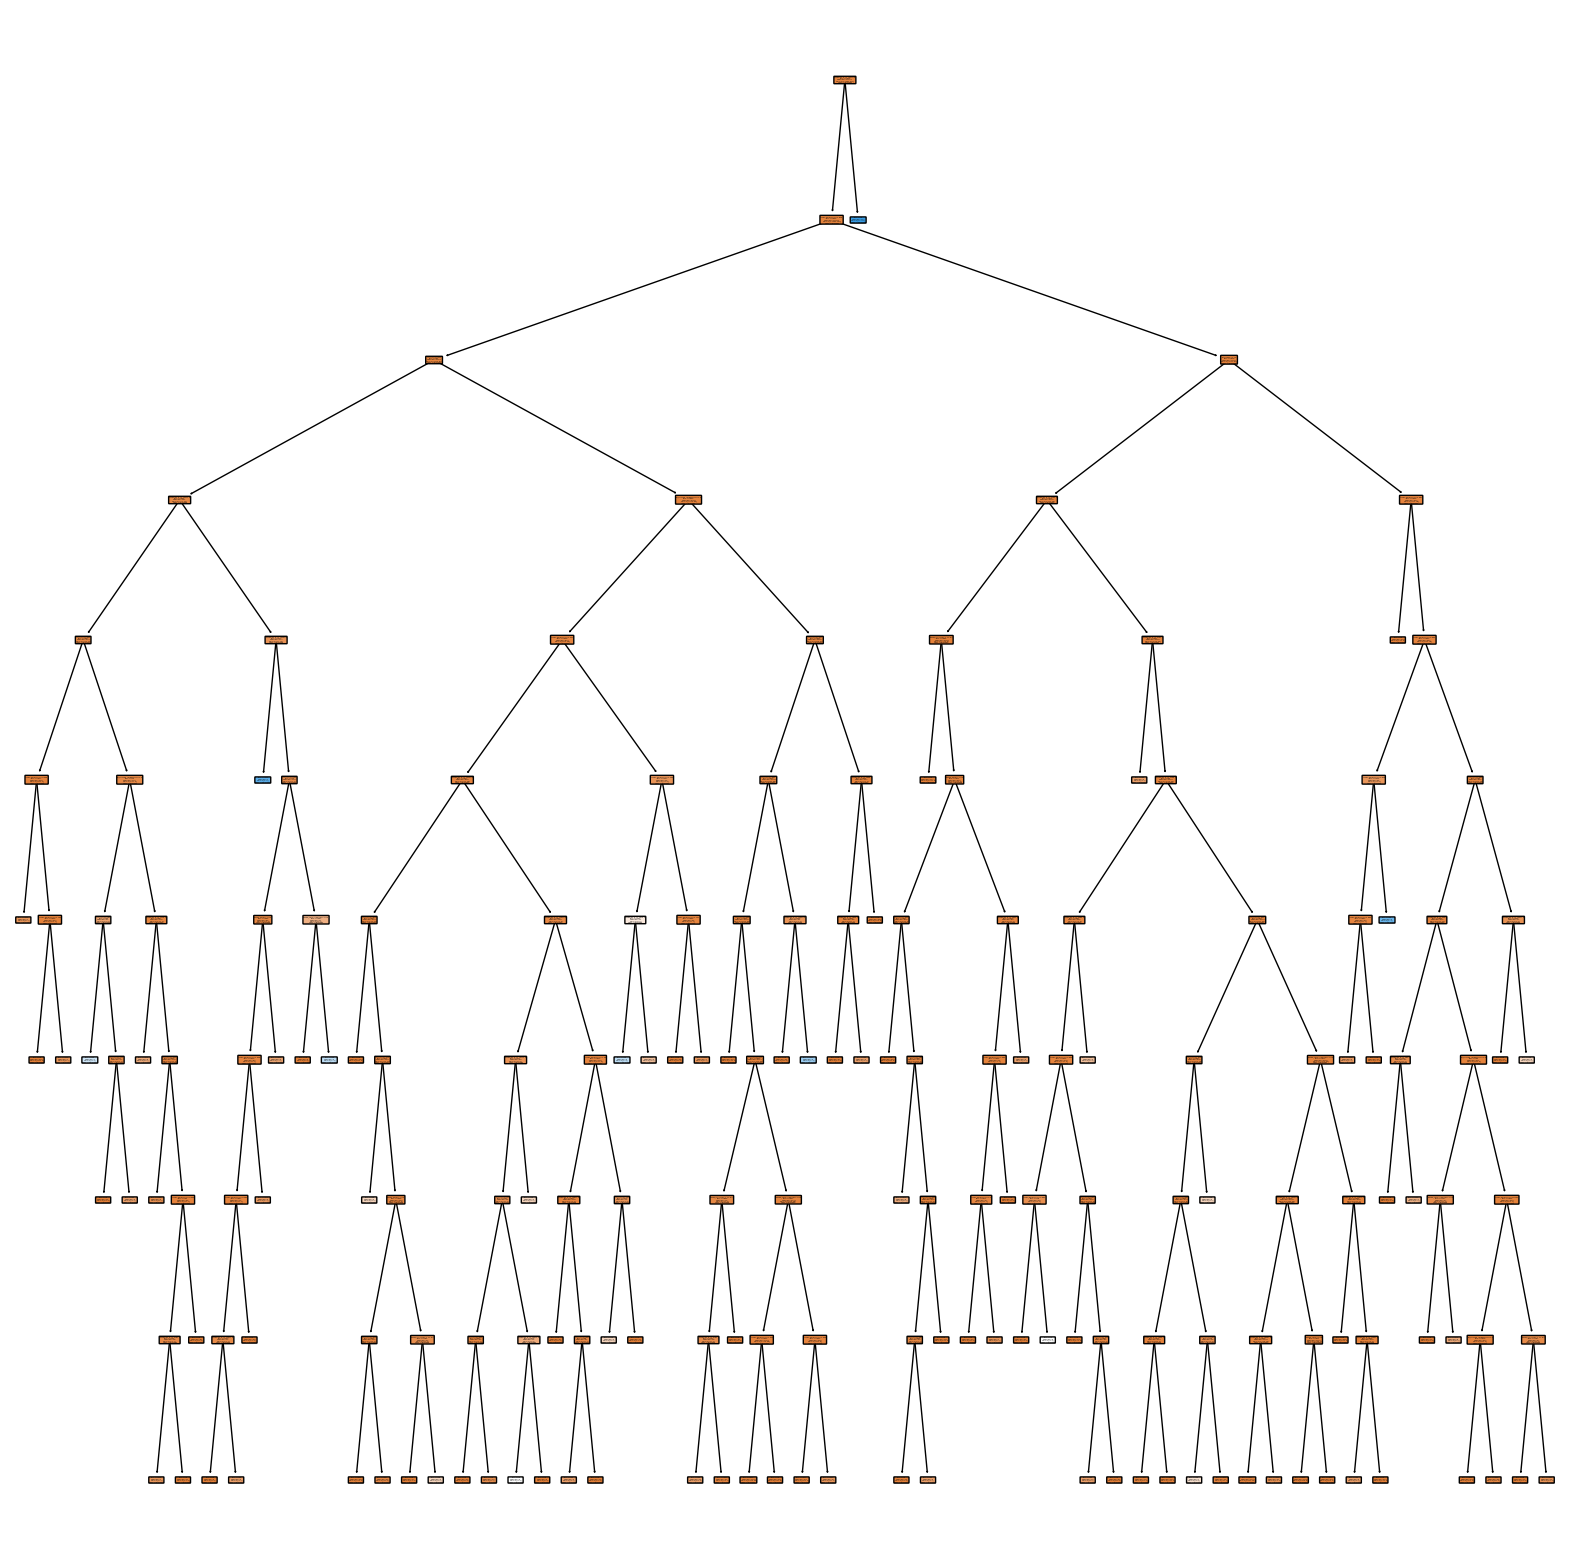

In [18]:
clf = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
clf = clf.fit(x_train,y_train)
plt.figure(figsize=[20,20])
plot_tree(clf,
         filled=True,
         rounded=True,
         class_names=['aprovado', 'reprovado'],
         feature_names=x_train.columns);

C:\Users\dedaz\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


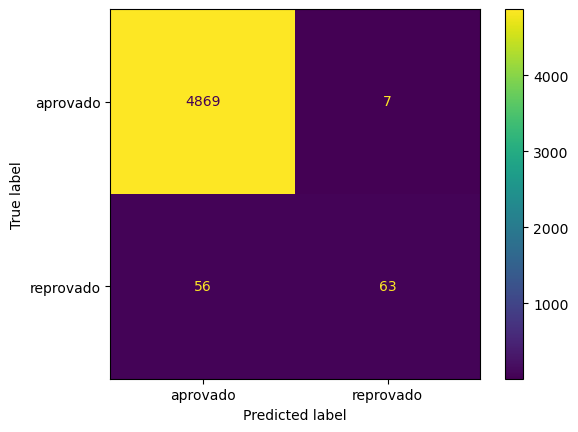

In [19]:
predict = clf.predict(x_test)
plot_confusion_matrix(clf, x_test, y_test, display_labels=['aprovado','reprovado'])

In [20]:
accuracy_score(y_test, predict)

0.9873873873873874

C:\Users\dedaz\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


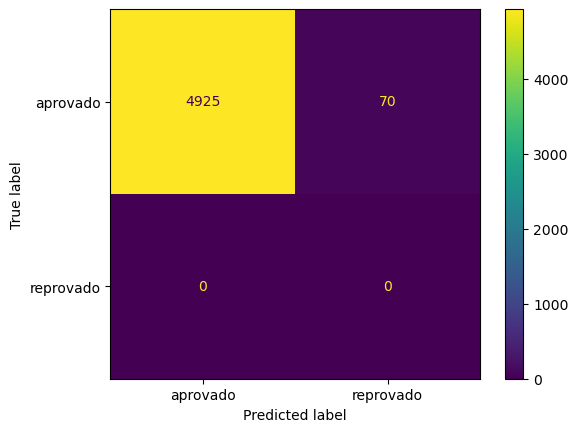

In [40]:
y_aprov= y_test
troca = {1:0,0:0}
y_aprov = y_aprov.map(troca)
plot_confusion_matrix(clf, x_test, y_aprov, display_labels=['aprovado','reprovado'])

In [41]:
accuracy_score(y_aprov, predict)

0.985985985985986